In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("house.csv")

df.head()

,City,Neighborhood,Previous_Rent,Size,Increase,Lot Area,Lot Config,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,Garage Area,SalePrice
0,New York,Manhattan,2500,80,5.0,4770,Corner,3,3,1998,262,121,104327
1,Los Angeles,Hollywood,2200,75,6.5,4424,Inside,4,4,2009,1816,86,845139
2,Chicago,Lincoln Park,1800,85,4.2,5129,Corner,9,8,1938,583,5,509396
3,Houston,Downtown,1500,90,5.7,9582,FR3,7,10,1919,1831,472,412300
4,Phoenix,Desert Ridge,1400,78,6.0,3091,FR2,10,2,1989,65,24,705856


In [3]:
df.columns

Index(['City', 'Neighborhood', 'Previous_Rent', 'Size', 'Increase', 'Lot Area',
       'Lot Config', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Total Bsmt SF', 'Garage Area', 'SalePrice'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           200 non-null    object 
 1   Neighborhood   200 non-null    object 
 2   Previous_Rent  200 non-null    int64  
 3   Size           200 non-null    int64  
 4   Increase       200 non-null    float64
 5   Lot Area       200 non-null    int64  
 6   Lot Config     200 non-null    object 
 7   Overall Qual   200 non-null    int64  
 8   Overall Cond   200 non-null    int64  
 9   Year Built     200 non-null    int64  
 10  Total Bsmt SF  200 non-null    int64  
 11  Garage Area    200 non-null    int64  
 12  SalePrice      200 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 20.4+ KB


In [5]:
df.describe()

,Previous_Rent,Size,Increase,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,Garage Area,SalePrice
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1970.000000,86.770000,5.737500,4836.740000,7.290000,7.645000,1972.755000,1106.545000,304.415000,665141.875000
std,524.380467,4.925281,0.785832,1616.714832,2.120941,2.007267,28.483178,361.744014,98.602765,230046.703253
min,1000.000000,72.000000,3.700000,1325.000000,1.000000,1.000000,1901.000000,29.000000,5.000000,74742.000000
25%,1500.000000,83.750000,5.200000,3800.000000,6.000000,7.000000,1953.000000,920.000000,260.000000,501463.000000
50%,1900.000000,87.000000,5.800000,4300.000000,8.000000,8.000000,1984.000000,1120.000000,310.000000,709185.000000
75%,2400.000000,90.250000,6.400000,5432.000000,9.000000,9.000000,1995.000000,1332.250000,370.000000,843166.250000
max,3200.000000,96.000000,7.200000,9873.000000,10.000000,10.000000,2016.000000,1950.000000,489.000000,995132.000000


In [6]:
df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
Increase         0.663001
Overall Qual     0.656046
Size             0.653113
Previous_Rent    0.648510
Year Built       0.583426
Garage Area      0.490296
Overall Cond     0.364268
Total Bsmt SF    0.217678
Lot Area        -0.420573
Name: SalePrice, dtype: float64

## Finding Outliers

<Axes: xlabel='Size', ylabel='SalePrice'>

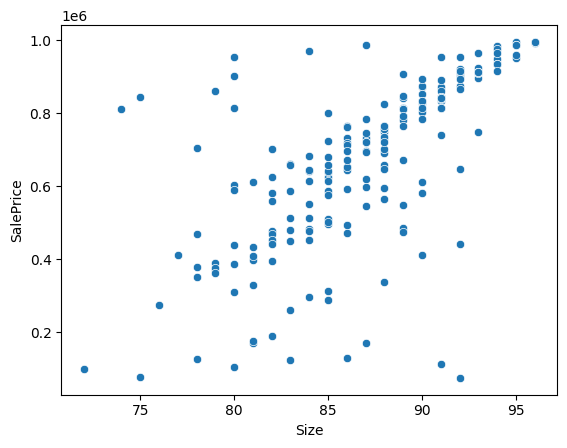

In [7]:
sbn.scatterplot(data= df, x = "Size",y = "SalePrice")

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

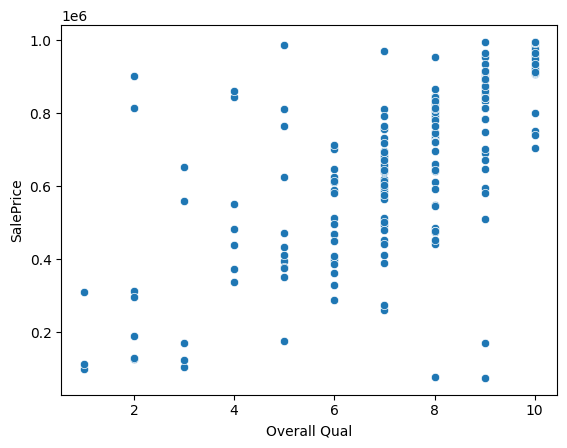

In [8]:
sbn.scatterplot(data = df, x = "Overall Qual",y = "SalePrice")

In [9]:
df[(df["Size"] >= 75) & (df["SalePrice"]< 200000)]

,City,Neighborhood,Previous_Rent,Size,Increase,Lot Area,Lot Config,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,Garage Area,SalePrice
0,New York,Manhattan,2500,80,5.0,4770,Corner,3,3,1998,262,121,104327
10,Austin,Zilker,2100,87,5.4,3924,CulDSac,9,10,1909,359,443,170967
14,Charlotte,South End,1600,81,5.5,5731,FR2,3,8,1934,1852,483,171103
17,Seattle,Capitol Hill,2600,91,6.4,7637,Inside,1,4,1918,460,34,113781
22,Detroit,Midtown,1200,75,3.8,9028,Inside,8,6,1965,1627,233,75912
25,Memphis,Midtown,1000,82,4.2,5753,FR2,2,7,1943,1586,267,189131
31,Albuquerque,Uptown,1100,78,3.9,6935,Inside,2,7,1954,1446,242,126276
34,Sacramento,Midtown,1400,83,4.8,1325,FR3,3,4,1931,1422,101,123750
35,Kansas City,Westport,1500,86,5.2,4571,Inside,2,6,1911,273,264,127947
40,Miami,Brickell,2300,92,6.2,7880,Corner,9,10,1959,1950,90,74742


## Missing Data

In [10]:
df.isna().sum()

City             0
Neighborhood     0
Previous_Rent    0
Size             0
Increase         0
Lot Area         0
Lot Config       0
Overall Qual     0
Overall Cond     0
Year Built       0
Total Bsmt SF    0
Garage Area      0
SalePrice        0
dtype: int64

## Heatmap

<Axes: >

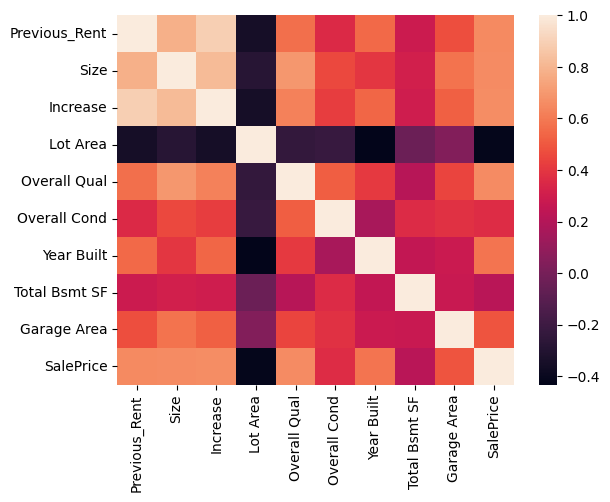

In [11]:
sbn.heatmap(df.corr(numeric_only=True))

## Grid Search

In [12]:
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
len(df)

200

## Dummy Variables

In [15]:
df = pd.get_dummies(df,drop_first=True)

In [16]:
df

,Previous_Rent,Size,Increase,Lot Area,Overall Qual,Overall Cond,Year Built,Total Bsmt SF,Garage Area,SalePrice,...,Neighborhood_Willow Glen,Neighborhood_Winter Park,Neighborhood_Yorkville,Neighborhood_Zamalek,Neighborhood_Zilker,Neighborhood_Śródmieście,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,2500,80,5.0,4770,3,3,1998,262,121,104327,...,False,False,False,False,False,False,False,False,False,False
1,2200,75,6.5,4424,4,4,2009,1816,86,845139,...,False,False,False,False,False,False,False,False,False,True
2,1800,85,4.2,5129,9,8,1938,583,5,509396,...,False,False,False,False,False,False,False,False,False,False
3,1500,90,5.7,9582,7,10,1919,1831,472,412300,...,False,False,False,False,False,False,False,False,True,False
4,1400,78,6.0,3091,10,2,1989,65,24,705856,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2000,88,5.9,4000,8,8,1987,1200,330,721854,...,False,False,False,False,False,True,False,False,True,False
196,1800,86,5.6,4500,8,9,1992,1180,320,695432,...,False,False,False,False,False,False,False,False,False,True
197,2300,90,6.2,3800,9,8,1995,1250,350,784651,...,False,False,False,False,False,False,False,True,False,False
198,1700,85,5.4,3700,6,7,1983,950,270,612841,...,False,False,False,False,False,False,False,False,False,False


In [17]:
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=9)

In [19]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [20]:
scaler_X_train

array([[ 1.04416145,  0.90557396,  0.87182232, ..., -0.34352936,
        -0.39223227, -0.59446065],
       [-0.30383386, -0.11192487, -0.14143364, ..., -0.34352936,
        -0.39223227,  1.68219714],
       [ 0.46644917,  0.49857442,  0.74516532, ..., -0.34352936,
        -0.39223227, -0.59446065],
       ...,
       [-0.11126311,  0.09157489, -0.01477665, ..., -0.34352936,
        -0.39223227, -0.59446065],
       [-1.45925842, -1.73992299, -1.53466059, ..., -0.34352936,
         2.54950976, -0.59446065],
       [ 1.62187373,  1.51607325,  1.2517933 , ..., -0.34352936,
        -0.39223227,  1.68219714]])

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [22]:
elastic_model = ElasticNet()

## Model Comparison

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
param_grid = {
    "alpha" : [0.1,1,3,10,30,100],
    "l1_ratio" : [0.1,0.5,0.7,0.95,0.99,1]
}

In [27]:
grid_model_1 = GridSearchCV(estimator=elastic_model,param_grid=param_grid,scoring="neg_mean_squared_error",cv = 5,verbose= 2)

In [28]:
grid_model_1.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.572e+10, tolerance: 7.686e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.934e+09, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+09, tolerance: 7.686e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+09, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.740e+09, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.476e+09, tolerance: 7.637e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END ................................alpha=3, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+10, tolerance: 7.637e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+10, tolerance: 7.914e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.960e+10, tolerance: 7.557e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.493e+09, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 3, 10, 30, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [30]:
pred_1 = grid_model_1.predict(X_test)

In [31]:
print("MAE :",mean_absolute_error(y_test, pred_1))
print("RMSE :",np.sqrt(mean_squared_error(y_test,pred_1)))

MAE : 65435.465217756966
RMSE : 111357.78235140932


In [32]:
y_test.mean()

np.float64(711143.45)

In [33]:
y.mean()

np.float64(665141.875)

In [34]:
mean_absolute_error(y_test,pred_1) / y.mean()

np.float64(0.09837820723249001)

In [35]:
grid_model_2 = GridSearchCV(estimator=elastic_model,param_grid=param_grid,scoring="neg_mean_squared_error",cv = 5,verbose= 2)

In [36]:
grid_model_2.fit(scaler_X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.991e+09, tolerance: 7.686e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.831e+09, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+09, tolerance: 7.686e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.363e+09, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+09, tolerance: 7.686e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.096e+08, tolerance: 7.454e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+09, tolerance: 7.557e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.870e+09, tolerance: 7.686e+08
  model = cd_fast.enet_coordinate_descent(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to inc

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 3, 10, 30, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
pred_2 = grid_model_2.predict(scaler_X_test)

In [38]:
print("MAE :",mean_absolute_error(y_test, pred_2))
print("RMSE :",np.sqrt(mean_squared_error(y_test,pred_2)))

MAE : 62098.8641773804
RMSE : 94378.86296130806
